In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/db
Income Response


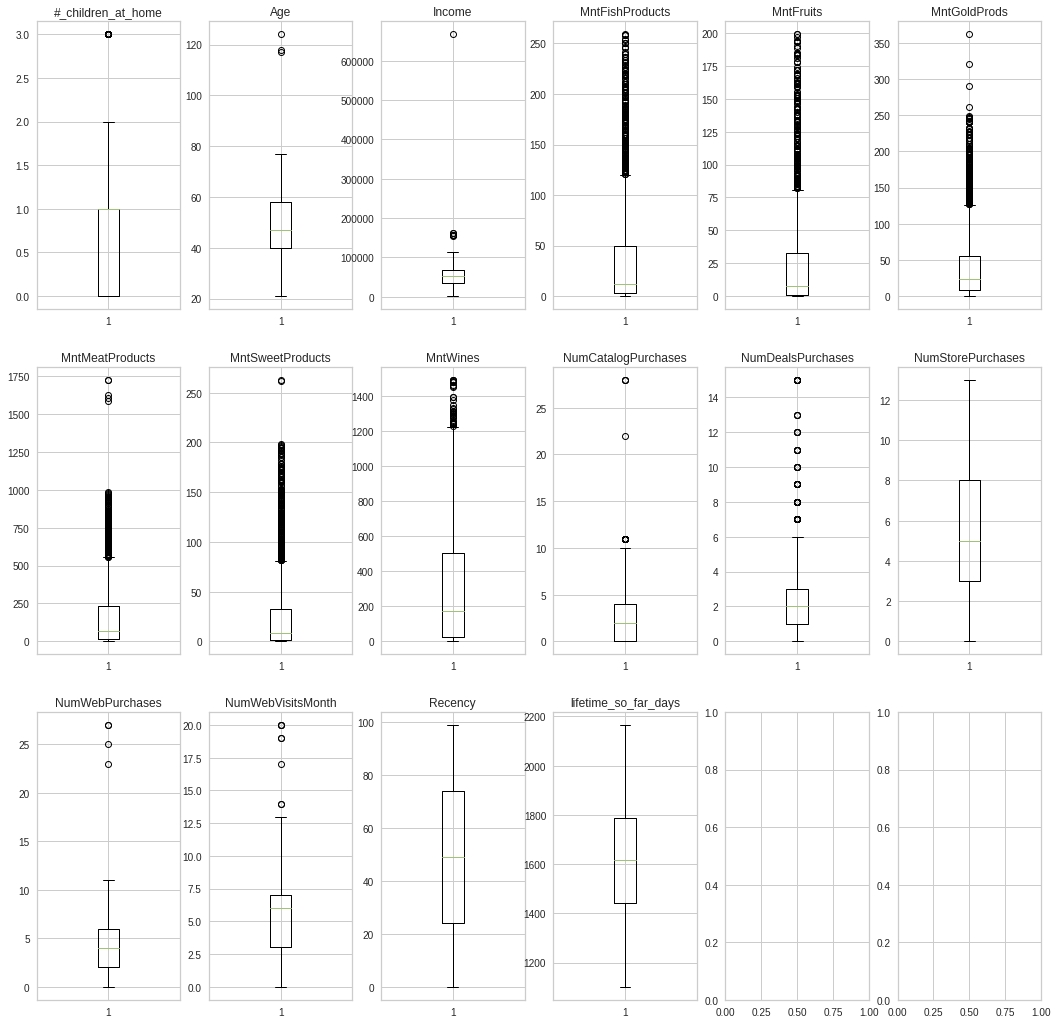

Ready
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 1 to 2240
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           2240 non-null   float64
 1   Recency                          2240 non-null   int32  
 2   MntWines                         2240 non-null   float64
 3   MntFruits                        2240 non-null   float64
 4   MntMeatProducts                  2240 non-null   float64
 5   MntFishProducts                  2240 non-null   float64
 6   MntSweetProducts                 2240 non-null   float64
 7   MntGoldProds                     2240 non-null   float64
 8   NumDealsPurchases                2240 non-null   int32  
 9   NumWebPurchases                  2240 non-null   int32  
 10  NumCatalogPurchases              2240 non-null   int32  
 11  NumStorePurchases                2240 non-null   int32  
 12  NumWebVisitsMo

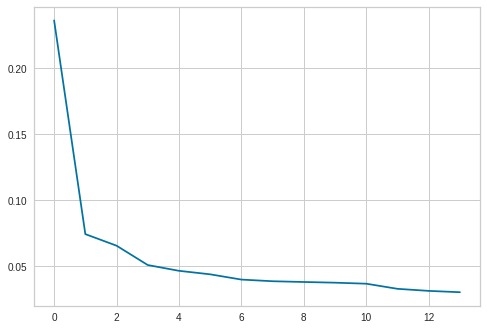

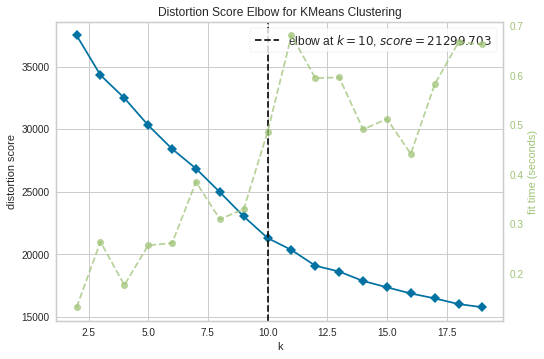

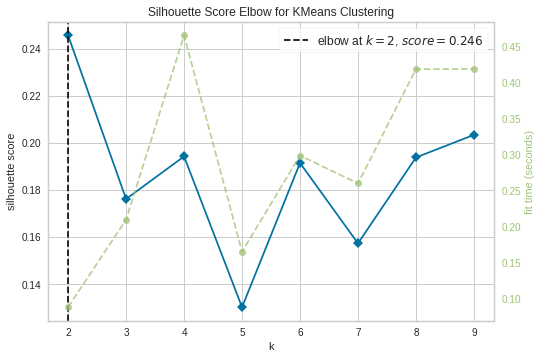

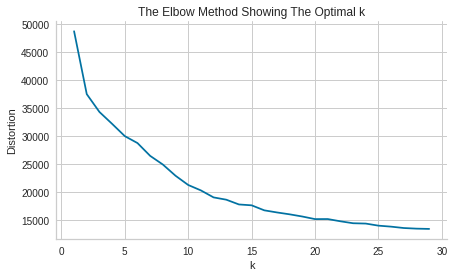

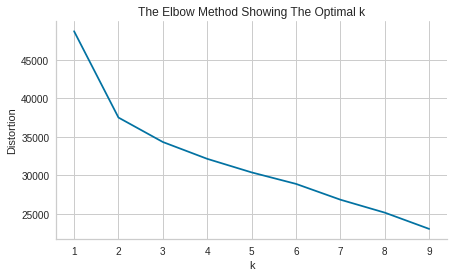

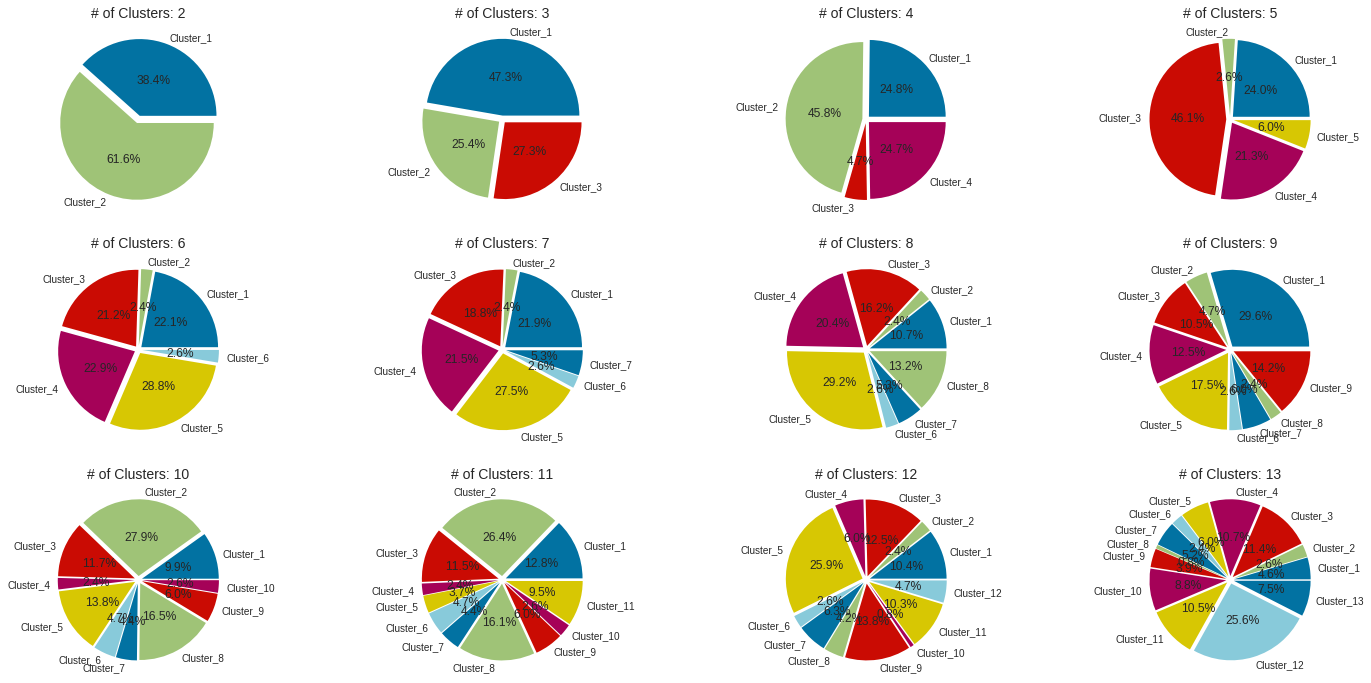

In [30]:
%run '/content/drive/My Drive/PLATZI-Documentos/1.Practice_projects/GitHub/Learning-AI-and-ML-with-a-Marketing-Campaign-dataset/3.-Standardization, PCA & K_Means.ipynb'

General settings

In [31]:
mk = mk.astype({'clusters':'category','#_children_at_home':'category','Promotion_#_campaign_accepted':'category'})
mk = mk.sort_values('clusters')
colors= ['#7497ED','#EE4C87','#38E542']
sns_colors = {0:'#7497ED', 1:'#EE4C87', 2:'#38E542'}
labels1=['Cluster 1', 'Cluster 2', 'Cluster 3']
labels2=['1', '2', '3']

### **General view of the cluster´s universe**

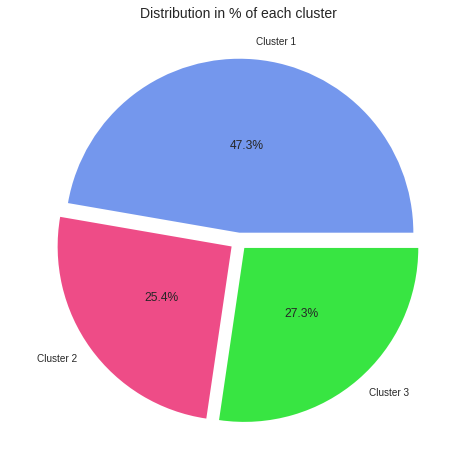

In [33]:
plt.subplots(1, 1, figsize=(8,8))

data = mk.groupby("clusters")['Income'].count()
g1 = data.plot(kind='pie', autopct="%.1f%%", labels=labels1, colors= colors, explode=[0.05]*3, pctdistance=0.5, legend=[] )
g1.set_title("Distribution in % of each cluster", fontsize=14)
g1.set_ylabel(' ')

plt.show()

### **General characteristics of the population**

Let´s start to analyze the characteristics of each cluster

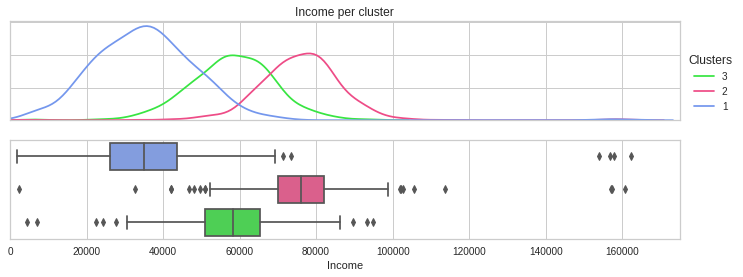

In [34]:
# Income distribution per cluster
fig, ax = plt.subplots(2, 1, figsize=(12,4))

g1 = sns.kdeplot(mk['Income'],hue=mk['clusters'],palette= sns_colors ,ax = ax[0])
g1.set(yticklabels=[], xticklabels=[], title='Income per cluster', ylabel=None, xlabel=None)
g1.legend(labels=labels2[::-1],
        title="Clusters",
        loc="lower left",
        bbox_to_anchor=(1, 0, 0.5, 1))
ax[0].set_xlim(0,175000)

g2= sns.boxplot(data=mk, x='Income', y= 'clusters',palette= sns_colors, ax = ax[1])
g2.set(yticklabels=[], ylabel=None)
ax[1].set_xlim(0,175000)
plt.show()

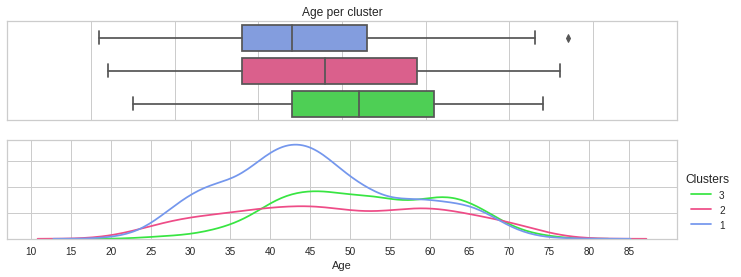

In [35]:
# Age distribution per cluster
fig, ax = plt.subplots(2, 1, figsize=(12,4))

g2= sns.boxplot(data=mk, x='Age', y= 'clusters',palette= sns_colors, ax = ax[0])
g2.set(yticklabels=[], xticklabels=[], title='Age per cluster', ylabel=None, xlabel=None)
ax[0].set_xlim(10,90)

g1 = sns.kdeplot(mk['Age'],hue=mk['clusters'],palette= sns_colors,ax = ax[1])
g1.set(yticklabels=[], ylabel=None)
g1.legend(labels=labels2[::-1],
        title="Clusters",
        loc="lower left",
        bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(range(10, 90, 5))
plt.show()

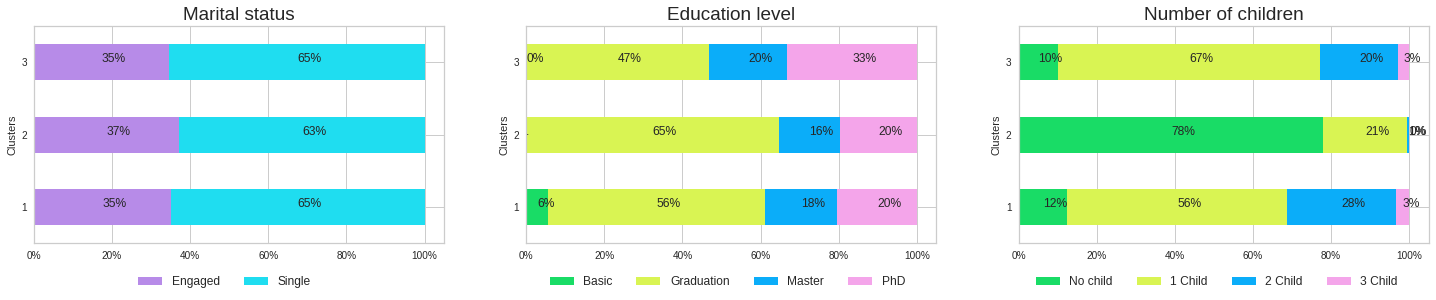

In [36]:
# Material status & Education level & number of childen in each cluster:

# Marital status: generating the dataframe:
status= pd.DataFrame(mk.groupby(['clusters','Marital_Status'])[['Education']].count()).reset_index()
status = status.pivot_table(values='Education', index='clusters', columns='Marital_Status').reset_index()

# Education level: generating the dataframe:
education = pd.DataFrame(mkd.groupby('clusters')[['Education_Basic','Education_Graduation','Education_Master','Education_PhD']].sum()).reset_index()

# Number of children:
children = pd.DataFrame(mk.groupby(['clusters','#_children_at_home'])[['Education']].count()).reset_index()
children = children.pivot_table(values='Education', index='clusters', columns='#_children_at_home').reset_index()

# Generating the graph:
fig, ax = plt.subplots(1,3, figsize=(25,4))
ax = ax.ravel()

barh_100_per(status, num_charts='several', axes=0, yticklabels=['1','2','3'], ylabel='Clusters', labels=['Engaged','Single'], color=['#B78BE8','#1FDDF0'],
             title='Marital status', titlefs=19, bbox_position= [0.75, 0], labelfs=12, box_ncol=500)

barh_100_per(education, num_charts='several',axes=1, yticklabels=['1','2','3'], ylabel='Clusters', labels=['Basic','Graduation','Master','PhD'],
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA'], title='Education level', titlefs=19, bbox_position= [1, 0], labelfs=12, box_ncol=500)

barh_100_per(children, num_charts='several',axes=2, yticklabels=['1','2','3'], ylabel='Clusters', labels=['No child','1 Child','2 Child','3 Child'],
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA'], title='Number of children', titlefs=19, bbox_position= [1, 0], labelfs=12, box_ncol=500)



plt.show()

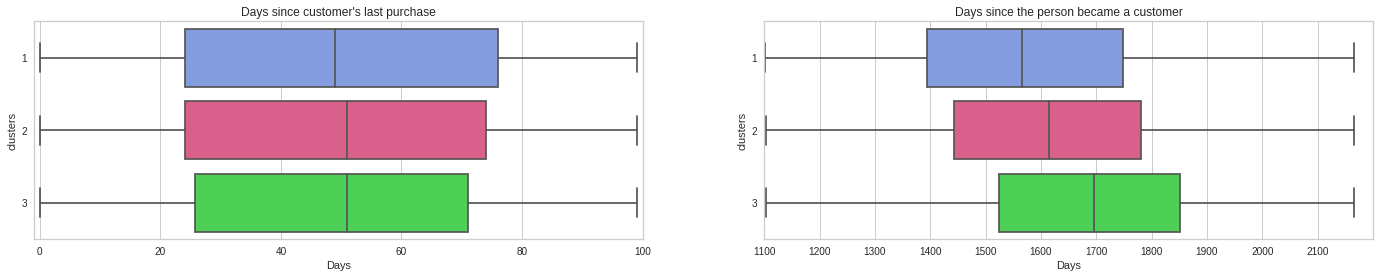

In [37]:
# Number of days since customer's last purchase
fig, ax = plt.subplots(1, 2, figsize=(24,4))
ax = ax.ravel()

g1= sns.boxplot(data=mk, x='Recency', y= 'clusters',palette= sns_colors, ax = ax[0])
g1.set(yticklabels=['1','2','3'], title='Days since customer\'s last purchase', xlabel='Days')
ax[0].set_xlim(-1,100)

# Number of days that have passed since the person started to be a customer´s company.
g2= sns.boxplot(data=mk, x='lifetime_so_far_days', y= 'clusters',palette= sns_colors, ax = ax[1])
g2.set(yticklabels=['1','2','3'], title='Days since the person became a customer', xlabel='Days')
ax[1].set_xlim(1100,2200)
plt.xticks(range(1100,2200, 100))

plt.show()

### **Product categories by cluster (Expenditure in the last 2 years)**

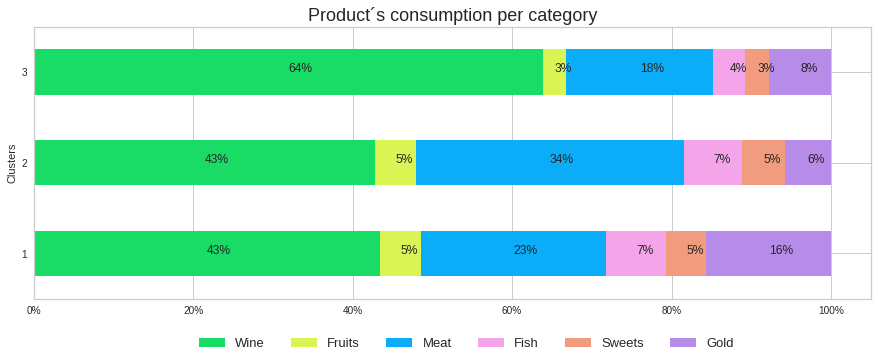

In [38]:
products = pd.DataFrame(mkd.groupby('clusters')[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum()).reset_index()
barh_100_per(products, yticklabels=['1','2','3'], fig_length=15,fig_width=5, ylabel='Clusters', labels=['Wine','Fruits','Meat','Fish','Sweets','Gold'], 
             color=['#19DC66','#D9F453','#0BADF9','#F4A5EA','#F19C7F','#B78BE8'], title='Product´s consumption per category', titlefs=18, 
             bbox_position= [0.9, 0], labelfs=13, box_ncol=500)


### **Promotion: Reaction to the campaigns**

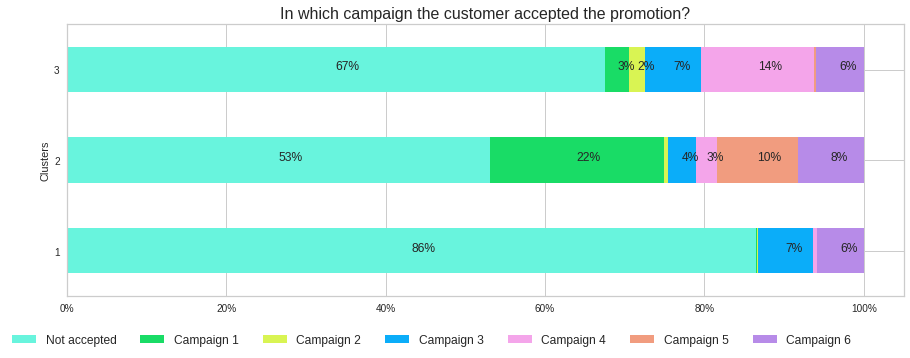

In [43]:
campaign = pd.DataFrame(mk.groupby(['clusters','Promotion_#_campaign_accepted'])[['Education']].count()).reset_index()
campaign = campaign.pivot_table(values='Education', index='clusters', columns='Promotion_#_campaign_accepted').reset_index()
barh_100_per(campaign, yticklabels=['1','2','3'], fig_length=15,fig_width=5, ylabel='Clusters', labels=['Not accepted','Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Campaign 6'], 
             color=['#68F4DD','#19DC66','#D9F453','#0BADF9','#F4A5EA','#F19C7F','#B78BE8'], title='In which campaign the customer accepted the promotion?', titlefs=16, 
             bbox_position= [1, 0], labelfs=12, box_ncol=7)